In [1]:
import numpy 

from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Dataset creation
In this cell we are going to create our dataset, based on the following characteristics:
* A new drug is going has been tested to patients with age between 13 and 100
* The trial involves N participants (defined soon).
* Half of the N participants were under 65, the other half 65 or older.
* The 90% of the most old patients, has some side effects.
* The 90% of patients under 65, has not some side effects.

In [2]:
N = 2100 # The total number of patients, set to 1000 for each half

train_samples = []
train_labels  = []

for i in range(0, 50):
    # The 5% of 65 years old patients or older, hadn't some side effects.
    random_age_older   = randint(65, 100)
    train_samples.append(random_age_older)
    train_labels.append(0)
    
    # The 5% of patients under 65 years old, had some side effects.
    random_age_younger = randint(13, 64)
    train_samples.append(random_age_younger)
    train_labels.append(1)
    
for i in range(50, N):
    # The 95% of 65 years old patients or older, had some side effects.
    random_age_older   = randint(65, 100)
    train_samples.append(random_age_older)
    train_labels.append(1)
    
    # The 95% of patients under 65 years old, had no side effects.
    random_age_younger = randint(13, 64)
    train_samples.append(random_age_younger)
    train_labels.append(0)
    
# Let's convert our lists in numpy arrays
train_samples = numpy.array(train_samples)
train_labels  = numpy.array(train_labels)

# We are going to shuffle them for our Neural Network
train_labels, train_samples = shuffle(train_labels, train_samples)

# Typicaly, data are not normalized, also in our case.
# To normalize them, we are going to use the MinMaxScaler, compressing our data in range [0, 1]
scaler               = MinMaxScaler(feature_range = (0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [3]:
# Now that we have created our dataset, we can export it in the CSV format by using Pandas

import pandas

data_frame = pandas.DataFrame({'values': scaled_train_samples.reshape(N*2,), 'labels': train_labels})

In [4]:
data_frame.to_csv('./dataset/train/train.csv')

In [6]:
# Let's do the same thing but for test dataset

N = 50 # The total number of patients, set to 100 for each half

test_samples = []
test_labels  = []

for i in range(0, int(N*10/100)):
    # The 10% of 65 year old patients or older, has not some side effects.
    random_age_older = randint(65, 90)
    test_samples.append(random_age_older)
    test_labels.append(0)
    
    # The 10% of patients under 65 years old, has some side effects.
    random_age_younger = randint(18, 64)
    test_samples.append(random_age_younger)
    test_labels.append(1)

for i in range(int(N*10/100), N):
    # The 90% of 65 year old patients or older, has some side effects.
    random_age_older = randint(65, 90)
    test_samples.append(random_age_older)
    test_labels.append(1)
    
    # The 90% of patients under 65 years old, has not some side effects.
    random_age_younger = randint(18, 64)
    test_samples.append(random_age_younger)
    test_labels.append(0)
    
# Let's convert our lists in numpy arrays
test_samples = numpy.array(test_samples)
test_labels  = numpy.array(test_labels)

# We are going to shuffle them for our Neural Network
test_labels, test_samples = shuffle(test_labels, test_samples)

# Typicaly, data are not normalized, also in our case.
# To normalize them, we are going to use the MinMaxScaler, compressing our data in range [0, 1]
scaler              = MinMaxScaler(feature_range = (0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

data_frame = pandas.DataFrame({'values': scaled_test_samples.reshape(N*2,), 'labels': test_labels})
data_frame.to_csv('./dataset/test/test.csv')

### Model creation
Now that we have created our immaginary dataset, splitting it in Train and Test datasets, we are going to create the model using Keras. The model that we are going to create is a __Sequential Model__, with 3 layers of type __Dense__.

In [7]:
import tensorflow

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
# Here we are going to create the model, specifying the activation function for each type of layer

HIDDEN_LAYER_FUNCTION = 'relu'
OUPUT_LAYER_FUNCTION  = 'softmax'

model = Sequential()
model.add(Dense(units = 16, input_shape = (1, ), activation = HIDDEN_LAYER_FUNCTION))
model.add(Dense(units = 32, activation = HIDDEN_LAYER_FUNCTION))
model.add(Dense(units = 2, activation = OUPUT_LAYER_FUNCTION))

In [9]:
# Let's now prepare our model, setting the optimizer, 
# the metrics and the loss function that will be used.

LEARNING_RATE = 0.0001
LOSS          = 'sparse_categorical_crossentropy'
METR          = ['accuracy']

sgd = SGD(learning_rate = LEARNING_RATE)
model.compile(optimizer = sgd, loss = LOSS, metrics = METR)

### Training
Now we can train our neural network, we are doing this by using a batch size of 10 (passing 10 elements at time) and setting the number of epochs to 30.

In [11]:
EPOCHS     = 30
BATCH_SIZE = 10

history = model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = BATCH_SIZE, epochs = EPOCHS, shuffle = True, verbose = 2)

Epoch 1/30
378/378 - 1s - loss: 0.6456 - accuracy: 0.7093 - val_loss: 0.6454 - val_accuracy: 0.6738
Epoch 2/30
378/378 - 1s - loss: 0.6444 - accuracy: 0.7132 - val_loss: 0.6442 - val_accuracy: 0.6857
Epoch 3/30
378/378 - 1s - loss: 0.6431 - accuracy: 0.7206 - val_loss: 0.6430 - val_accuracy: 0.6857
Epoch 4/30
378/378 - 1s - loss: 0.6418 - accuracy: 0.7249 - val_loss: 0.6417 - val_accuracy: 0.6905
Epoch 5/30
378/378 - 0s - loss: 0.6404 - accuracy: 0.7307 - val_loss: 0.6403 - val_accuracy: 0.7024
Epoch 6/30
378/378 - 1s - loss: 0.6389 - accuracy: 0.7368 - val_loss: 0.6389 - val_accuracy: 0.7143
Epoch 7/30
378/378 - 1s - loss: 0.6374 - accuracy: 0.7434 - val_loss: 0.6373 - val_accuracy: 0.7143
Epoch 8/30
378/378 - 1s - loss: 0.6357 - accuracy: 0.7492 - val_loss: 0.6357 - val_accuracy: 0.7190
Epoch 9/30
378/378 - 1s - loss: 0.6339 - accuracy: 0.7561 - val_loss: 0.6339 - val_accuracy: 0.7286
Epoch 10/30
378/378 - 0s - loss: 0.6321 - accuracy: 0.7595 - val_loss: 0.6320 - val_accuracy: 0.7357

### Evaluate the training
Let's evaluate how the training process as gone, by analyzing the values of the accuracy and the loss function, both for the training set and for the validation set.

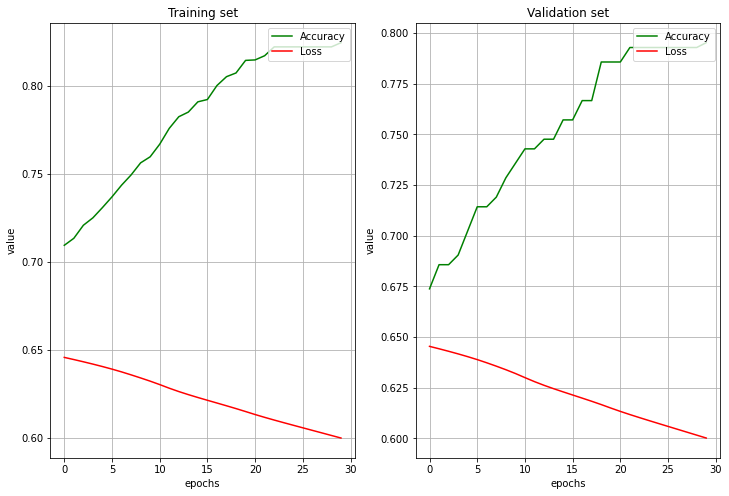

In [14]:
from matplotlib import pyplot

figures, (axes_1, axes_2) = pyplot.subplots(1, 2, figsize = (12, 8))

axes_1.set_title('Training set')
axes_1.set(xlabel = 'epochs', ylabel = 'value')
axes_1.grid(True)
axes_1.plot(history.history['accuracy'], label = 'Accuracy', color = 'green')
axes_1.plot(history.history['loss'], label = 'Loss', color = 'Red')
axes_1.legend(loc = 'upper right')

axes_2.set_title('Validation set')
axes_2.set(xlabel = 'epochs', ylabel = 'value')
axes_2.grid(True)
axes_2.plot(history.history['val_accuracy'], label = 'Accuracy', color = 'green')
axes_2.plot(history.history['val_loss'], label = 'Loss', color = 'Red')
axes_2.legend(loc = 'upper right')

### Testing
Now we can test the Neural Network, by using the test set previously defined.

In [15]:
# Let's set the paramet verbose to 0, because no output is needed
predictions = model.predict(x = scaled_test_samples, batch_size = BATCH_SIZE, verbose = 0)
rounded_predictions = numpy.argmax(predictions, axis = -1)

### Evaluate the testing
At this point we have created a model, train and evaluate it. Now, we have to compare the metrics that tell us the "efficiency" of our Nueral Network. The first one that we are going to show is the __Confusion Matrix__.

Confusion matrix, withput normalization
[[29 21]
 [ 5 45]]


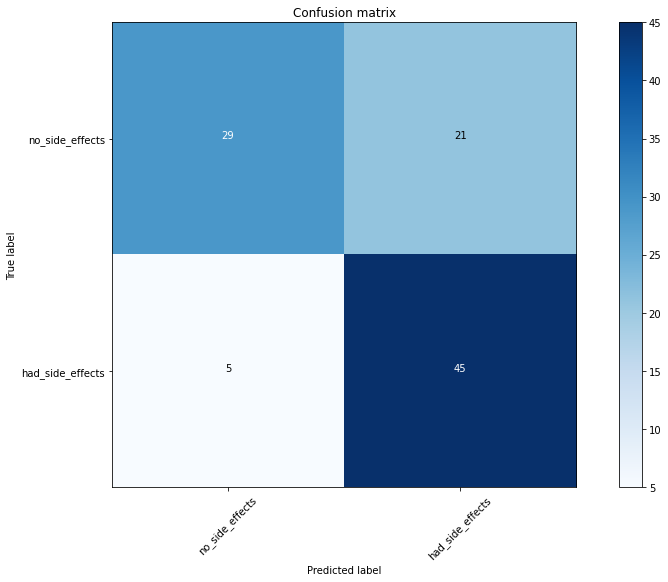

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

matrix = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

def plot_confusion_matrix(confusion_matrix, classes, normalize = False, title = 'Confusion matrix', cmap = pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize = True'.
    """
    
    pyplot.figure(figsize = (12, 8))
    pyplot.imshow(confusion_matrix, interpolation = 'nearest', cmap = cmap)
    pyplot.title(title)
    pyplot.colorbar()
    ticks_marks = numpy.arange(len(classes))
    pyplot.xticks(ticks_marks, classes, rotation = 45)
    pyplot.yticks(ticks_marks, classes)
    
    if (normalize):
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, withput normalization")
        
    print(confusion_matrix)
    thresh = confusion_matrix.max() / 2
    
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        pyplot.text(j, i, confusion_matrix[i, j], horizontalalignment = 'center', color = 'white'
                   if confusion_matrix[i, j] > thresh else 'black')
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    
confusion_matrix_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(matrix, classes = confusion_matrix_plot_labels)

### Save and Import the Model
Now that the model has been created, trained, tested and evaluated, we can save our model and export it.
The first thing that we are going to see is the __model.save__.

In [17]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.

import os.path
if os.path.isfile('models/medical_trial_model.ht') is False:
    model.save('models/medical_trial_model.h5')